## View data about ingredients

Danh sách category:
- alcoholic_beverages
- beverages
- cakes
- candies
- cereals_grains
- cold_cuts:_sausages_&_ham
- dried_fruits
- fresh_fruits
- fresh_meat
- fruit_jam
- grains_staples
- ice_cream_&_cheese
- instant_foods
- milk
- others
- seafood_&_fish_balls
- seasonings
- snacks
- vegetables
- yogurt

Số lượng phần tử mỗi category:
others: 1086
fruit_jam: 60
fresh_meat: 671
seafood_&_fish_balls: 434
cold_cuts:_sausages_&_ham: 66
seasonings: 1427
vegetables: 1448
grains_staples: 573
snacks: 570
alcoholic_beverages: 102
fresh_fruits: 469
milk: 150
cakes: 39
candies: 202
cereals_grains: 27
dried_fruits: 171
beverages: 379
instant_foods: 92
ice_cream_&_cheese: 129
yogurt: 17


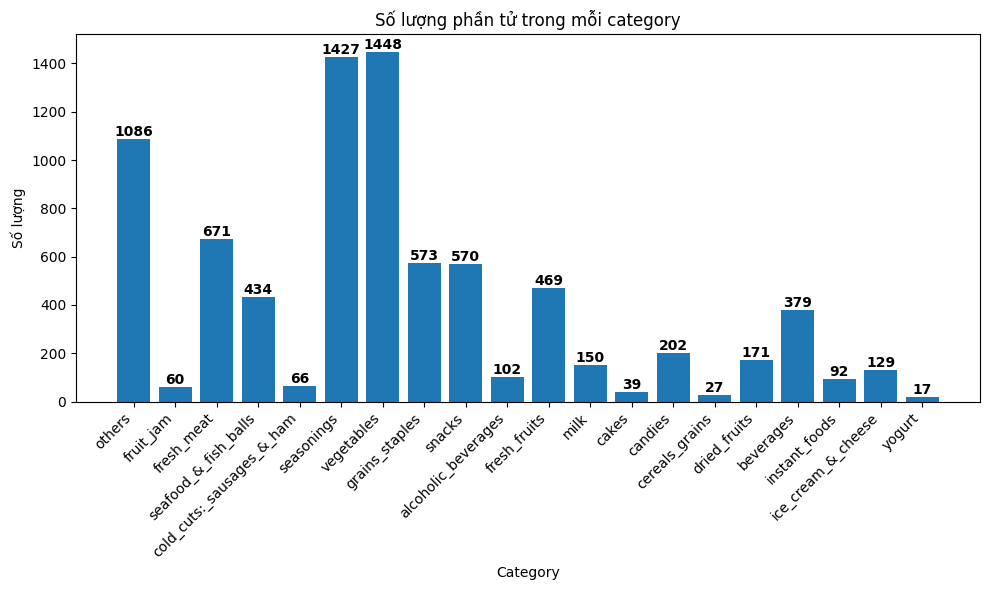

In [2]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# ---- Đọc dữ liệu JSON ----
json_path = r"C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json" 
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# ---- Lấy danh sách category ----
categories = [item["category"] for item in data if "category" in item]

# ---- In ra các category duy nhất ----
unique_categories = sorted(set(categories))
print("Danh sách category:")
for c in unique_categories:
    print("-", c)

# ---- Đếm số lượng phần tử mỗi category ----
category_counts = Counter(categories)
print("\nSố lượng phần tử mỗi category:")
for cat, count in category_counts.items():
    print(f"{cat}: {count}")

# ---- Visualize ----
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.keys(), category_counts.values())
# Hiển thị số lượng trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )
plt.xticks(rotation=45, ha="right")
plt.title("Số lượng phần tử trong mỗi category")
plt.xlabel("Category")
plt.ylabel("Số lượng")
plt.tight_layout()
plt.show()

In [ ]:
categories = {
    "alcoholic_beverages": "đồ uống có cồn",
    "beverages": "đồ uống",
    "cakes": "bánh ngọt",
    "candies": "kẹo",
    "cereals_grains": "ngũ cốc và hạt",
    "cold_cuts:_sausages_&_ham": "thịt nguội, xúc xích và giăm bông",
    "dried_fruits": "trái cây sấy khô",
    "fresh_fruits": "trái cây tươi",
    "fresh_meat": "thịt tươi",
    "fruit_jam": "mứt trái cây",
    "grains_staples": "lương thực chính (gạo, ngô, lúa mì, v.v.)",
    "ice_cream_&_cheese": "kem và phô mai",
    "instant_foods": "thực phẩm ăn liền",
    "milk": "sữa",
    "others": "khác",
    "seafood_&_fish_balls": "hải sản và cá viên",
    "seasonings": "gia vị",
    "snacks": "đồ ăn vặt",
    "vegetables": "rau củ",
    "yogurt": "sữa chua"
}

## Get nutri

In [4]:
import json

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)
ingredients = []
for raw_ingredient in raw[:10]:
    ingredient = {
        'name_vi': raw_ingredient['name_vi'],
        'name_en': raw_ingredient['name_en']
    }
    ingredients.append(ingredient)
for i in ingredients:
    print(i)

{'name_vi': 'all purpose cream', 'name_en': 'All-purpose cream -> Sour cream'}
{'name_vi': 'anh đào ngâm đường cắt nhỏ', 'name_en': 'Candied Cherries Cut Small'}
{'name_vi': 'axit citric', 'name_en': 'Citric Acid'}
{'name_vi': 'ba ba', 'name_en': 'Softshell turtle'}
{'name_vi': 'ba chỉ', 'name_en': 'Pork belly'}
{'name_vi': 'ba chỉ bò', 'name_en': 'Beef brisket'}
{'name_vi': 'ba chỉ bò mỹ', 'name_en': 'Beef brisket'}
{'name_vi': 'ba chỉ rút sườn', 'name_en': 'Pork ribeye'}
{'name_vi': 'ba khía', 'name_en': 'Shrimp'}
{'name_vi': 'ba rọi heo', 'name_en': 'Pork belly'}


In [ ]:
import requests
from requests_oauthlib import OAuth1
import time
import json
import os
from dotenv import load_dotenv
from tqdm import tqdm

load_dotenv()
CONSUMER_KEY = os.getenv('CONSUMER_KEY')
CONSUMER_SECRET = os.getenv('CONSUMER_SECRET')
BASE_URL = "https://platform.fatsecret.com/rest/server.api"

In [36]:
def search_food(query):
    auth = OAuth1(CONSUMER_KEY, CONSUMER_SECRET)
    params = {
        "method": "foods.search",
        "search_expression": query,
        "format": "json"
    }

    res = requests.get(BASE_URL, params=params, auth=auth).json()
    # Nếu có lỗi từ API
    if "error" in res:
        raise Exception(res["error"]["message"])
    # Không có kết quả
    if "foods" not in res or "food" not in res["foods"]:
        raise Exception("Missing field 'food' in response")

    food = res["foods"]["food"][0]
    return food['food_description']

In [45]:
def get_input(input_file):
    if input_file.endswith('.json'):
        with open(input_file, 'r', encoding='utf-8') as fin:
            ingredients = json.load(fin)
    elif input_file.endswith('.txt'):
        ingredients = []
        with open(input_file, 'r', encoding='utf-8') as fin:
            for line in fin:
                id, name, _ = line.strip().split('\t')
                ingre = {
                    'id': id,
                    'name_en': name
                }
                ingredients.append(ingre)
    else:
        return None
    return ingredients

In [ ]:
#input_file = './data/ingredient_v1.json'
input_file = './data/tmp/pre_error.txt'
nutri_file = './data/tmp/ingredient_v1_nutri.jsonl'   # JSON Lines
error_file = './data/tmp/error.txt'

BATCH_SIZE = 50   # mỗi 100 nguyên liệu thì flush xuống file

ingredients = get_input(input_file)

batch_nutri = []
batch_error = []

for ingre in tqdm(ingredients):
    try:
        time.sleep(0.2)
        item = ingre['name_en']
        food = search_food(item)

        batch_nutri.append({
            "id": ingre['id'],
            "name": ingre['name_en'],
            "nutrition": food
        })

    except Exception as e:
        batch_error.append(f"{ingre['id']}\t{ingre['name_en']}\t{str(e)}")

    # ------------------------------------------------
    # GHI FILE THEO BATCH
    # ------------------------------------------------
    if len(batch_nutri) >= BATCH_SIZE:
        with open(nutri_file, "a", encoding='utf-8') as f:
            for row in batch_nutri:
                f.write(json.dumps(row, ensure_ascii=False) + "\n")
        batch_nutri = []   # clear batch

    if len(batch_error) >= 20:
        with open(error_file, "a", encoding='utf-8') as f:
            for line in batch_error:
                f.write(line + "\n")
        batch_error = []   # clear batch

# ------------------------------------------------
# GHI NỐT PHẦN CÒN LẠI
# ------------------------------------------------
if batch_nutri:
    with open(nutri_file, "a", encoding='utf-8') as f:
        for row in batch_nutri:
            f.write(json.dumps(row, ensure_ascii=False) + "\n")

if batch_error:
    with open(error_file, "a", encoding='utf-8') as f:
        for line in batch_error:
            f.write(line + "\n")

print("\n DONE!")
print(f"✔ Saved nutrition batch-wise → {nutri_file}")
print(f"✔ Saved errors → {error_file}")


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


 DONE!
✔ Saved nutrition batch-wise → ./data/tmp/ingredient_v1_nutri.jsonl
✔ Saved errors → ./data/tmp/error.txt


In [10]:
import json
import re

def parse_nutrition(nutrition_str):
    """
    Chuyển chuỗi nutrition dạng:
        "Per 178g - Calories: 227kcal | Fat: 3.51g | Carbs: 50.17g | Protein: 2.21g"
    thành dict:
        {
            "per": "178g",
            "calories": 227,
            "fat": 3.51,
            "carbs": 50.17,
            "protein": 2.21
        }
    """
    result = {}
    
    # Lấy phần "Per ..."
    per_match = re.search(r"Per\s+([^-\n]+)", nutrition_str)
    if per_match:
        result["per"] = per_match.group(1).strip()

    # Lấy Calories
    cal_match = re.search(r"Calories:\s*([\d\.]+)", nutrition_str)
    if cal_match:
        result["calories"] = float(cal_match.group(1))

    # Lấy Fat, Carbs, Protein
    for key in ["Fat", "Carbs", "Protein"]:
        match = re.search(rf"{key}:\s*([\d\.]+)", nutrition_str)
        if match:
            result[key.lower()] = float(match.group(1))

    return result


output = "/mnt/disk1/hachi/crawler/data/tmp/ingredient_v1_nutri_v2.json"
input = '/home/gpus/hachi/convenient-shopping-system/crawler/data/tmp/ingredient_v1_nutri.jsonl'

nutris = {}
with open(input, 'r', encoding='utf-8') as fin:
    for line in fin:
        line = line.strip()
        data = json.loads(line)
        nutris[data['id']] = parse_nutrition(data["nutrition"])
    

In [11]:
nutris

{'ingre00002': {'per': '178g',
  'calories': 227.0,
  'fat': 3.51,
  'carbs': 50.17,
  'protein': 2.21},
 'ingre00003': {'per': '3 tbsp',
  'calories': 70.0,
  'fat': 4.5,
  'carbs': 0.0,
  'protein': 6.0},
 'ingre00004': {'per': '2674g',
  'calories': 1284.0,
  'fat': 44.39,
  'carbs': 60.43,
  'protein': 124.61},
 'ingre00005': {'per': '100g',
  'calories': 518.0,
  'fat': 53.01,
  'carbs': 0.0,
  'protein': 9.34},
 'ingre00006': {'per': '100g',
  'calories': 155.0,
  'fat': 7.37,
  'carbs': 0.0,
  'protein': 20.72},
 'ingre00007': {'per': '100g',
  'calories': 155.0,
  'fat': 7.37,
  'carbs': 0.0,
  'protein': 20.72},
 'ingre00008': {'per': '1 serving',
  'calories': 320.0,
  'fat': 23.0,
  'carbs': 2.0,
  'protein': 27.0},
 'ingre00009': {'per': '101g',
  'calories': 145.0,
  'fat': 2.37,
  'carbs': 1.25,
  'protein': 27.82},
 'ingre00010': {'per': '100g',
  'calories': 518.0,
  'fat': 53.01,
  'carbs': 0.0,
  'protein': 9.34},
 'ingre00012': {'per': '100g',
  'calories': 541.0,
  

In [12]:
len(nutris)

650

In [13]:
import json
base_path = './data/ingredient_v1.json'
with open(base_path, 'r', encoding='utf-8') as f:
    data_v1 = json.load(f)
    
data_v2 = []

for ingre in data_v1:
    if nutris.get(ingre['id']) and ingre['unit']:
        ingre2 = {
            'id': ingre['id'],
            'name': ingre['name_vi'],
            'category': ingre['category'],
            'unit': ingre['unit'],
            'nutrition': nutris[ingre['id']]
        }
        data_v2.append(ingre2)
with open('./data/ingredient_v2.json', 'r', encoding='utf-8') as f:
    base = json.load(f)
print(len(base))  
base.extend(data_v2)  
print(len(base))
with open('./data/ingredient_v2.json', 'w', encoding='utf-8') as f:
    json.dump(base, f, ensure_ascii=False, indent=2)
    

6610
7251


In [14]:
# Thay chỉ số index
with open('./data/ingredient_v2.json', 'r', encoding='utf-8') as f:
    base = json.load(f)
    
index = 0
for ingre in base:
    ingre['id'] = index
    index += 1

with open('./data/ingredient_v3.json', 'w', encoding='utf-8') as f:
    json.dump(base, f, ensure_ascii=False, indent=2)

## Filter recipes and ingredients

In [16]:
#TODO: Loại các ingredient có - > \ trong name_en. Done
#TODO: Loại các recipe có nguyên liệu có đơn vị 'ít', hay những đơn vị không hợp lệ khác
#TODO: xóa các ingredient đã bị xóa trong recipe

In [17]:
# oz
# tbsp : thìa canh

### Eliminate ingredients having unexpected characters

In [18]:
import re

input_list = ["hello", "user-name", "data/file", "world", "test.case", "python"]

# Tạo pattern regex: [-/.] nghĩa là tìm ký tự - HOẶC / HOẶC .
# Lưu ý: Dấu . trong regex cần escape (\.) nếu ở ngoài ngoặc vuông, 
# nhưng trong [] thì thường được hiểu là nghĩa đen. Để an toàn ta dùng \.
pattern = r"[-/\.]"

# Giữ lại chuỗi nếu re.search KHÔNG tìm thấy pattern
clean_list = [s for s in input_list if not re.search(pattern, s)]

print(clean_list)
# Kết quả: ['hello', 'world', 'python']

['hello', 'world', 'python']


In [19]:
import json
import re

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)

# Tạo pattern regex: [-/.] nghĩa là tìm ký tự - HOẶC / HOẶC .
# Lưu ý: Dấu . trong regex cần escape (\.) nếu ở ngoài ngoặc vuông, 
# nhưng trong [] thì thường được hiểu là nghĩa đen. Để an toàn ta dùng \.
pattern = r"[-/\.]"

ingredients = []
for raw_ingredient in raw:
    name_vi = raw_ingredient['name_vi']
    name_en = raw_ingredient['name_en']
    if not re.search(pattern, name_vi) and not re.search(pattern, name_en):
        ingredient = {
            'name_vi': name_vi,
            'name_en': name_en,
            'cacategory': raw_ingredient['category']
        }
        ingredients.append(ingredient)

In [20]:
import json

file_ingredients = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\ingredient_knowledge_base.json'
with open(file_ingredients, 'r', encoding='utf-8') as f:
    raw = json.load(f)

In [21]:
len(raw)

8112

In [22]:
ingredients = [
    {
        'id': item['id'],
        'name_vi': item['name_vi'],
        'name_en': item['name_en'],
        'category': item['category']
    }
    for item in raw
    if not any(char in item['name_vi'] + item['name_en'] for char in '-/.')
]

In [23]:
len(ingredients)

7489

In [24]:
from typing import DefaultDict
file_recipe = r'C:\Users\Lenovo\Desktop\20251\SE\code\IT4990-Convenient-Shopping-System\crawler\raw_data\dish_knowledge_base.json'
with open(file_recipe, 'r', encoding='utf-8') as f:
    recipes = json.load(f)
ingredients_unit = DefaultDict(set)
for recipe in recipes:
    for ingredient in recipe['ingredients']:
        ingredients_unit[ingredient['ingredient_id']].add(ingredient['unit'])

In [25]:
len(ingredients_unit)

8070

In [26]:
for ingredient in ingredients:
    ingredient['unit'] = list(ingredients_unit[ingredient['id']])

In [27]:
ingredients_unit

defaultdict(set,
            {'ingre04303': {'gr', 'kg'},
             'ingre01354': {'g',
              'gr',
              'gram',
              'kg',
              'lát',
              'quả',
              'trái',
              'ít'},
             'ingre02673': {'bó',
              'chén',
              'cái',
              'cây',
              'củ',
              'g',
              'gr',
              'gram',
              'lá',
              'muỗng',
              'muỗng canh',
              'muỗng cà phê',
              'nhánh',
              'ít'},
             'ingre06233': {'bó',
              'cây',
              'g',
              'gr',
              'gram',
              'hạt',
              'muỗng canh',
              'nhánh',
              'ít'},
             'ingre03268': {'g', 'gr', 'gram', 'kg', 'quả', 'trái'},
             'ingre08055': {'g',
              'gr',
              'gram',
              'lát',
              'muỗng',
              'muỗng canh',
             

In [28]:
out_file = './data/ingredient_v1.json'
with open(out_file, 'w', encoding='utf-8') as fout:
    json.dump(ingredients, fout, ensure_ascii=False, indent=2)

In [1]:
import json
with open('./data/ingredient_v1.json', 'r', encoding='utf-8') as f:
    raw = json.load(f)

ingredients = [
    item
    for item in raw
    if not any(char in item['name_vi'] + item['name_en'] for char in '-/.:;,_')
]

In [3]:
len(raw)

7486

In [2]:
len(ingredients)

7388

In [4]:
out_file = './data/ingredient_v1.json'
with open(out_file, 'w', encoding='utf-8') as fout:
    json.dump(ingredients, fout, ensure_ascii=False, indent=2)

### Chuyển lượng nutrition

In [19]:
with open('./data/ingredient_v3.json', 'r', encoding='utf-8') as f:
    ingredients = json.load(f)

cat = set()
for ingre in ingredients:
    cat.add(ingre['nutrition']['per'].split(' ')[-1])

In [20]:
len(cat)

417

In [21]:
cat

{'100',
 '100g',
 '1011g',
 '1012g',
 '1014g',
 '101g',
 '1026g',
 '102g',
 '1038g',
 '104g',
 '1050g',
 '105g',
 '1061g',
 '1080g',
 '1086g',
 '1087g',
 '108g',
 '109g',
 '111g',
 '1129g',
 '112g',
 '1137g',
 '1142g',
 '114g',
 '1152g',
 '1153g',
 '1158g',
 '1163g',
 '1179g',
 '1180g',
 '118g',
 '1204g',
 '1207g',
 '120g',
 '1212g',
 '122g',
 '1259g',
 '125g',
 '126g',
 '1277g',
 '127g',
 '128g',
 '1292g',
 '1295g',
 '129g',
 '1316g',
 '131g',
 '1324g',
 '132g',
 '133g',
 '137g',
 '1389g',
 '140g',
 '1417g',
 '1423g',
 '1426g',
 '143g',
 '1456g',
 '1489g',
 '148g',
 '1493g',
 '150g',
 '1513g',
 '151g',
 '152g',
 '153g',
 '155g',
 '1562g',
 '1564g',
 '1586g',
 '158g',
 '160g',
 '1610g',
 '162g',
 '1637g',
 '1638g',
 '164g',
 '165g',
 '166g',
 '169g',
 '1705g',
 '170g',
 '171g',
 '1729g',
 '172g',
 '1737g',
 '173g',
 '1746g',
 '174g',
 '175g',
 '176g',
 '177g',
 '178g',
 '1809g',
 '180g',
 '181g',
 '1879g',
 '187g',
 '188g',
 '190g',
 '1926g',
 '1956g',
 '1964g',
 '1979g',
 '197g',
 '20

In [23]:
with open('/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v3.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

data_v4 = []
id = 0
for ingre in data:
    for unit in ingre['unit']:
        ingre4 = {
            'id': id,
            'name': ingre['name'],
            'category': ingre['category'],
            'unit': unit,
            "nutrition": ingre['nutrition']
        }
        data_v4.append(ingre4)
        id += 1
        
out_file = './data/ingredient_v4.json'
with open(out_file, 'w', encoding='utf-8') as fout:
    json.dump(data_v4, fout, ensure_ascii=False, indent=2)

In [ ]:
# lưu tiếng việt
# ko đếm đc => g, ml
# chỉnh lại nutrition_per fit với unit

#### Finetune Category + convert uncount_unit into g and ml

In [20]:
import json
import os

file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v4.json'
with open(file, 'r', encoding='utf-8') as f:
    data = json.load(f)

unit = set()
for ingr in data:
    unit.add(ingr['unit'])

len(unit)

41

In [21]:
len(data)

12427

In [22]:
filter_data = [ingre 
               for ingre in data 
               if not any(char in ingre['name'] for char in'.:;()&-_')
               ]

In [27]:
filter_data = [ingre 
               for ingre in filter_data 
               if not ingre['name'].startswith('g ')
               ]

In [ ]:
s = 'greerg'
s.startswith()

In [28]:
len(filter_data)

12343

In [29]:
new_file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v5.json'
with open(new_file, 'w', encoding='utf-8') as f:
    json.dump(filter_data, f, ensure_ascii=False, indent=2)

In [6]:
unit = set()
for ingr in filter_data:
    unit.add(ingr['unit'])

len(unit)

40

In [15]:
print(unit)

{'lá', 'kg', 'tô', 'con', 'ly', 'bình', 'thìa', 'hạt', 'ml', 'trái', 'miếng', 'thìa canh', 'tép', 'muỗng canh', 'g', 'cốc', 'củ', 'nhánh', 'lít', 'gam', 'cái', 'chén', 'lát', 'bó', 'gói', 'muỗng cà phê', 'gram', 'muỗng cafe', 'cây', 'thìa cà phê', 'muỗng', 'bát', 'ống', 'kí', 'l', 'ký', 'quả', 'tách', 'L', 'ít', 'hộp', 'gr'}


In [1]:
import json
file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v5.json'
with open(file, 'r', encoding='utf-8') as f:
    filter_data = json.load(f)

In [2]:
countable_units = [
    'lá', 'con', 'trái', 
     'củ', 'nhánh', 'cái', 
     'bó', 'gói', 'cây',  'quả', 'hộp'
]

uncountA = [
    'kg', 'ml', 'g', 'gam', 'gram', 'l', 'lít', 'kí', 'ký', 'L', 'gr', 'ít'
]

uncountB = [
    'tô', 'ly', 'thìa', 'thìa canh','muỗng canh', 'cốc', 'muỗng cà phê', 'muỗng cafe',
    'thìa cà phê', 'muỗng', 'bát', 'chén', 'ống', 'lát', 'hạt', 'miếng', 'tép'
]


In [3]:
# countable_units
num = 0
for ingre in filter_data:
    if ingre['unit'] in countable_units:
        num += 1
        ingre['unit_recipe'] = ingre['unit']
print(num)

2169


In [4]:
unit_map = {
    # --- Mass → gram ---
    'g': ('g', 1),
    'gram': ('g', 1),
    'gam': ('g', 1),
    'gr': ('g', 1),
    
    'kg': ('g', 1000),
    'kí': ('g', 1000),
    'ký': ('g', 1000),
    
    # --- Volume → ml ---
    'ml': ('ml', 1),
    
    'l': ('ml', 1000),
    'L': ('ml', 1000),
    'lít': ('ml', 1000),

    # --- Special case ---
    'ít': ('g', 5),   # mặc định 1 "ít" = 5g
}


In [5]:
# uncount A
num = 0
for ingre in filter_data:
    if ingre['unit'] in uncountA:
        num += 1
        ingre['unit_recipe'] = ingre['unit']
        ingre['unit'], ingre['quantity'] = unit_map[ingre['unit_recipe']]
print(num)

7312


In [6]:
# uncount B
uncountB = [
    'tô', 'ly', 'thìa', 'thìa canh','muỗng canh', 'cốc', 'muỗng cà phê', 'muỗng cafe',
    'thìa cà phê', 'muỗng', 'bát', 'chén', 'ống', 'lát', 'hạt', 'miếng', 'tép'
]

In [7]:
unit_map_B = {
    # Dụng cụ đong loại lớn
    'tô': ('g', 250),
    'bát': ('g', 200),
    'ly': ('g', 150),
    'cốc': ('g', 140),
    'chén': ('g', 100),
    'ống': ('g', 100),

    # Muỗng loại lớn (tablespoon)
    'thìa canh': ('g', 15),
    'muỗng canh': ('g', 15),

    # Muỗng loại nhỏ (teaspoon)
    'muỗng cà phê': ('g', 5),
    'muỗng cafe': ('g', 5),
    'thìa cà phê': ('g', 5),

    # Muỗng / thìa chung chung
    'muỗng': ('g', 10),
    'thìa': ('g', 10),

    'lát': ('g', 3),
    'hạt': ('g', 1),
    'miếng': ('g', 3),
    'tép': ('g', 2)
}


In [8]:
num = 0
for ingre in filter_data:
    if ingre['unit'] in uncountB:
        num += 1
        ingre['unit_recipe'] = ingre['unit']
        ingre['unit'], ingre['quantity'] = unit_map_B[ingre['unit_recipe']]
print(num)

2862


In [9]:
cate = set()
for ingre in filter_data:
    cate.add(ingre['category'])

In [10]:
cate

{'alcoholic_beverages',
 'beverages',
 'cakes',
 'candies',
 'cereals_grains',
 'cold_cuts:_sausages_&_ham',
 'dried_fruits',
 'fresh_fruits',
 'fresh_meat',
 'fruit_jam',
 'grains_staples',
 'ice_cream_&_cheese',
 'instant_foods',
 'milk',
 'others',
 'seafood_&_fish_balls',
 'seasonings',
 'snacks',
 'vegetables',
 'yogurt'}

In [11]:
category_map = {
    'alcoholic_beverages': 'đồ uống có cồn',
    'beverages': 'đồ uống',
    'cakes': 'bánh ngọt',
    'candies': 'kẹo',
    'cereals_grains': 'ngũ cốc',
    'cold_cuts:_sausages_&_ham': 'đồ nguội, xúc xích & giăm bông',
    'dried_fruits': 'trái cây sấy',
    'fresh_fruits': 'trái cây tươi',
    'fresh_meat': 'thịt tươi',
    'fruit_jam': 'mứt trái cây',
    'grains_staples': 'lương thực (gạo, mì, bột)',
    'ice_cream_&_cheese': 'kem & phô mai',
    'instant_foods': 'thực phẩm ăn liền',
    'milk': 'sữa',
    'others': 'khác',
    'seafood_&_fish_balls': 'hải sản & chả cá',
    'seasonings': 'gia vị',
    'snacks': 'đồ ăn vặt',
    'vegetables': 'rau củ',
    'yogurt': 'sữa chua'
}

In [12]:
for ingre in filter_data:
    ingre['category'] = category_map[ingre['category']]

In [13]:
new_file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v6.json'
with open(new_file, 'w', encoding='utf-8') as f:
    json.dump(filter_data, f, ensure_ascii=False, indent=2)

#### Fix nutrition_per to fit with unit

In [ ]:
# phân chia thành đếm được và không đếm được, trên mỗi cái sẽ có cách ánh xạ khác nhau
# đếm đươc: x1
# không đếm đc: x 100g or ml kiểu z
# loại các cái khó xử lý đi là đc :)))

In [1]:
import json
file  = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v6.json'
with open(file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [2]:
countable_units = [
    'lá', 'con', 'trái', 
     'củ', 'nhánh', 'cái', 
     'bó', 'gói', 'cây',  'quả', 'hộp'
]

uncountable_units = [
    'g', 'ml'
]

In [3]:
countable_data = [
    ingre
    for ingre in data
    if ingre['unit'] in countable_units
]

uncountable_data = [
    ingre
    for ingre in data
    if ingre['unit'] in uncountable_units
]

In [4]:
# for countable_data 
print(len(countable_data))

2169


In [8]:
import re
from fractions import Fraction

def parse_fraction(num_str: str) -> float:
    """
    Chuyển chuỗi số hoặc phân số thành float.
    Ví dụ:
        '1/4' → 0.25
        '3 1/2' → 3.5
        '2' → 2.0
    """
    num_str = num_str.strip()

    # Hỗn số: "3 1/2"
    if " " in num_str and "/" in num_str:
        whole, frac = num_str.split()
        return float(whole) + float(Fraction(frac))

    # Phân số: "1/4"
    if "/" in num_str:
        return float(Fraction(num_str))

    # Số bình thường
    return float(num_str)


def split_value_unit(s: str):
    """
    Tách số và đơn vị từ chuỗi có thể chứa phân số, hỗn số, ký tự ", '.
    Ví dụ:
        '247g' → (247.0, 'g')
        '1/4 cup' → (0.25, 'cup')
        '3 1/2 tbsp' → (3.5, 'tbsp')
        '2" brownie' → (2.0, 'brownie')
    """

    s = s.replace('"', '').replace("'", "").strip().lower()

    # Regex bắt hỗn số hoặc phân số hoặc số
    #   - hỗn số: 3 1/2
    #   - phân số: 1/4
    #   - số: 2, 2.5
    pattern = r'^([0-9]+(?:\s+[0-9]+/[0-9]+|/[0-9]+|(?:\.[0-9]+)?))\s*(.*)$'
    match = re.match(pattern, s)

    if not match:
        return None, None

    num_str = match.group(1)
    unit = match.group(2).strip()

    value = parse_fraction(num_str)

    return value, unit



In [71]:
file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/tmp/tmp.json'
with open(file, 'w', encoding='utf-8') as f:
    json.dump(countable_data, f, ensure_ascii=False, indent=2)

In [72]:
new_data = []

In [73]:
from typing import DefaultDict
count = DefaultDict(list)
for ind, ingre in enumerate(countable_data):
    value, unit = split_value_unit(ingre['nutrition']['per'])
    count[unit].append([ind, value])

In [74]:
count.keys()

dict_keys(['g', 'tbsp', 'tsp', 'tsp (1.5 g)', 'sachet', 'twists', 'slice', 'serving', 'cup pieces', 'oz', 'cup', 'burger', 'pieces', 'bowl', 'sausage', 'medium shrimp', 'carrots', 'ounces', 'package', 'fillet', 'fillets', 'can drained', 'bottle', 'mint', 'packet', 'medium onions', 'cup slices', 'teaspoon', 'slices', 'croutons', 'tea bag', 'cup diced', 'potatoes', 'piece', 'fruit', 'pouch', 'container', 'cups', 'pack', 'block noodles with seasoning', 'bundle', 'can', 'cookies', 'sheet', 'tray', 'wedge', 'stick', 'scoop', 'fl oz', 'egg', 'egg roll', 'plums', 'shrimp', 'tablespoon', 'mini cup', 'tbsp dry', 'cubes', 'bar', 'bun', 'skewer', 'link', 'block', 'large pepper', 'medium pepper', 'peppers', 'bag', 'cookie', 'wrappers', 'cake', 'sandwich', 'sheets dried', 'cup cubes'])

In [131]:
len(count['cup cubes'])

1

In [133]:
mot = ['potatoes', 'cup', 'bowl', 'sausage', 'carrots', 'piece', 'sheet', 'fl oz', 'egg', 'bun']
theo = ['twists', 'pieces', 'package', 'bottle', 'mint', 'medium onions', 'croutons', 'tea bag', 'cups', 'pack', 'bundle', 'can', 'cookies', 'tbsp dry', 'cubes','large pepper', 'medium pepper', 'peppers' ]
thay =[('pound', 300), ('tray', 30)] 

In [136]:
#g
for unit, scale in thay:
    for lst in count[unit]:
        ind, value = lst
        value = value*scale
        ingre = countable_data[ind]
        calo, fat, carb, protein = ingre['nutrition']['calories'], ingre['nutrition']['fat'], ingre['nutrition']['carbs'], ingre['nutrition']['protein']
        new_ingre = {
            "name": ingre['name'],
            "category": ingre['category'],
            "unit": ingre['unit'],
            "nutrition": {
                'calories': calo/value,
                'fat': fat/value,
                'carbs': carb/value,
                'protein': protein/value
            },
            'unit_recipe': ingre['unit_recipe'],
        }
        new_data.append(new_ingre)

In [137]:
len(new_data)

2014

In [ ]:
# g => 1
# tbsp, tblsp, tbspt => 15g
# tsp, teaspoon => 5g
# cup => 200g
# scoop => 30g
# oz, ounces, ounce => 28g
# fl oz => 29.5 ml
# ml => ml

In [87]:
#tsp
num = 0
for lst in count['oz']:
    try:
        num += 1
        ind, value = lst
        value = 1
        ingre = countable_data[ind]
        calo, fat, carb, protein = ingre['nutrition']['calories'], ingre['nutrition']['fat'], ingre['nutrition']['carbs'], ingre['nutrition']['protein']
        new_ingre = {
            "name": ingre['name'],
            "category": ingre['category'],
            "unit": ingre['unit'],
            "nutrition": {
                'calories': calo/value,
                'fat': fat/value,
                'carbs': carb/value,
                'protein': protein/value
            },
            'unit_recipe': ingre['unit_recipe'],
        }
        new_data.append(new_ingre)
    except:
        continue
print(num)

46


In [81]:
new_data[-1]

{'name': 'bột cốt dừa',
 'category': 'lương thực (gạo, mì, bột)',
 'unit': 'gói',
 'nutrition': {'calories': 30.0, 'fat': 1.0, 'carbs': 4.0, 'protein': 1.0},
 'unit_recipe': 'gói'}

In [60]:
len(new_data)

9129

In [69]:
new_data[0]

{'name': 'bột hương hoa bưởi',
 'category': 'khác',
 'unit': 'g',
 'nutrition': {'calories': 3.3201407211961302,
  'fat': 0.10560246262093227,
  'carbs': 0.5592260334212841,
  'protein': 0.04200527704485488},
 'unit_recipe': 'muỗng cà phê',
 'quantity': 5}

In [138]:
file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/tmp/count.json'
with open(file, 'w', encoding='utf-8') as f:
    json.dump(new_data, f, ensure_ascii=False, indent=2)

In [9]:
pers = set()
for ingre in uncountable_data:
    value, unit = split_value_unit(ingre['nutrition']['per'])
    pers.add(unit)

In [10]:
len(pers)

139

In [11]:
pers

{'',
 None,
 'bag',
 'ball',
 'bar',
 'bar (6 pieces)',
 'block noodles with seasoning',
 'blocks',
 'bottle',
 'bowl',
 'breast',
 'brownie',
 'bun',
 'bundle',
 'burger',
 'cake',
 'cakes',
 'can',
 'can drained',
 'candy',
 'carton',
 'chaffle',
 'container',
 'cookie',
 'cookies',
 'crackers',
 'croutons',
 'cubes',
 'cup',
 'cup brewed',
 'cup diced',
 'cup dry',
 'cup dry mix',
 'cup pieces',
 'cup prepared',
 'cup prepared (1 cup frozen)',
 'cup slices',
 'cups',
 'dipped berry',
 'fillet',
 'fillets',
 'fl oz',
 'fries',
 'fruit',
 'g',
 'infuser',
 'ladle',
 'large pepper',
 'link',
 'links',
 'meal',
 'medium apple',
 'medium avocado',
 'medium onions',
 'medium pepper',
 'medium shrimp',
 'mini cup',
 'mint',
 'ml',
 'muffin',
 'olives',
 'ounce',
 'ounces',
 'oz',
 'pack',
 'package',
 'packet',
 'pan fried slice',
 'patty',
 'pie',
 'piece',
 'pieces',
 'plum',
 'plums',
 'pop',
 'portion',
 'potato',
 'pouch',
 'pretzel',
 'prunes',
 'riblet',
 'ribs',
 'rounded scoops',


#### Gộp

In [1]:
import json

count_file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/tmp/count.json'
uncount_file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/tmp/uncount.json'

data = []

with open(count_file, 'r', encoding='utf-8') as f:
    d1 = json.load(f)
for ingre in d1:
    ingre['type'] = 'countable'
    data.append(ingre)


with open(uncount_file, 'r', encoding='utf-8') as f:
    d2 = json.load(f)
for ingre in d2:
    ingre['type'] = 'uncountable'
    data.append(ingre)


In [2]:
len(data)

11142

In [4]:
file = '/home/gpus/hachi/convenient-shopping-system/crawler/data/ingredient_v7.json'
with open(file, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)